<a href="https://colab.research.google.com/github/FranklineMisango/Deep_Learning_Projects/blob/main/Brain_Tumor_Prediction_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the necessary libraries
#This version uses Lee Net Model Architecture
import pandas as pd
import numpy as np
import os
import random
import warnings
import matplotlib.pyplot as plt 
import math
import shutil
import glob
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline


warnings.filterwarnings('ignore')

In [ ]:
#Our Brain tumor dataset from Kaggle --> https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection?resource=download
#Dowload the archive and load to collab and ran an extraction code to unzip the files
#I modified the dataset to only include the healthy & Brain tumor datasets to proceed with training & testing
#Incase of wrong folder uploads use : shutil.rmtree('/content/BrH35-Mask-Modified', ignore_errors=True)
from google.colab import files

#This snippet allows the user to only extract Archives to collab's directory
uploaded = files.upload()
filename =  list(uploaded.keys())[0]
if filename.endswith('zip'):
  os.system('unzip {}'.format(filename))
elif filename.endswith('tar.gz'):
  os.system('tar -xzvf {}'.format(filename))
else:
  print("Unsupported file format")

Saving Br35H_Brain_Tumor_Dataset_Archive.zip to Br35H_Brain_Tumor_Dataset_Archive.zip


In [ ]:
#Counting the number of images that we have in classes ; [Brain Tumor] & [No Brain Tumor]
#We have both 1500 for Healthy Brain and 1500 for unhealthy dataset
image_directory = '/content/Br35H_Modified/'

no_tumor_images = os.listdir(image_directory + 'Healthy')
yes_tumor_images = os.listdir(image_directory + 'Brain_Tumor/')
#Initializing the Dataset and Label arrays
dataset =[]
label = []
#Defining the input size
INPUT_SIZE = 64

In [ ]:
#loop over each image in each category
#I modified this code from kaggle
for i , image_name in enumerate(no_tumor_images):
    #read the image if its extension is .jpg
    if(image_name.split('.')[1]=='jpg'):
        image = cv2.imread(image_directory+'Healthy/'+image_name)
        image = Image.fromarray(image,'RGB')
        #resize the image
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        #append image arry in dataset list and its label in label list
        dataset.append(np.array(image))
        label.append(0)

        # same for yes images
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'Brain_Tumor/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)
print(dataset)
print(label)
print(len(label))

[[[[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 3  3  3]
   [ 3  3  3]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 3  3  3]
   [ 3  3  3]
   [ 1  1  1]]

  ...

  [[ 1  1  1]
   [ 1  1  1]
   [ 2  2  2]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]

  [[ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 1  1  1]
   [ 1  1  1]]]


 [[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 

In [ ]:
#Converting the Dataset and label to numpy array
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

(2400, 64, 64, 3)
(2400,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [ ]:
# Normalise the data for training purpose
x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

In [ ]:
#Building a simple CNN model with 32,32,64
#Version 2.0 Reaches 128
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),  kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Dense(2))
model.add(Activation('sigmoid'))
# model.add(Activation('softmax'))
model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

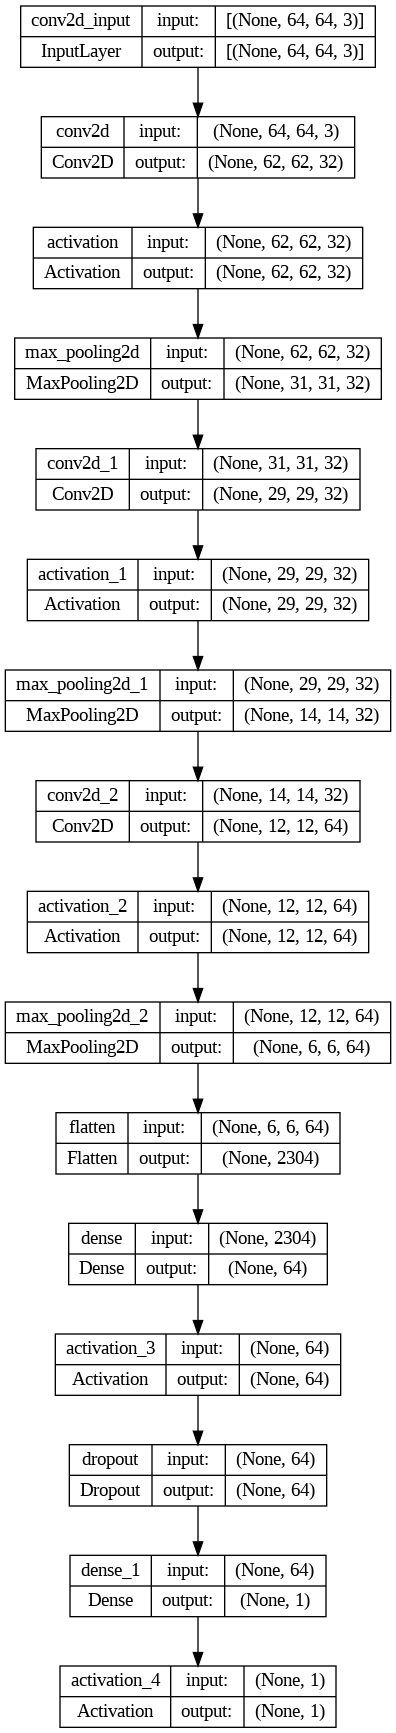

In [ ]:
tf.keras.utils.plot_model(model,
                          to_file="model.png",
                          show_shapes=True,
                          expand_nested=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Simple modelling without Validation 
model.fit(x_train, y_train, 
batch_size = 16, 
verbose = 1, epochs = 10, 
validation_data = (x_test, y_test),
shuffle = 'False')

Epoch 1/10
150/150 [==============================] - 19s 116ms/step - loss: 0.5394 - accuracy: 0.7271 - val_loss: 0.4482 - val_accuracy: 0.8200
Epoch 2/10
150/150 [==============================] - 15s 102ms/step - loss: 0.3987 - accuracy: 0.8392 - val_loss: 0.3518 - val_accuracy: 0.8500
Epoch 3/10
150/150 [==============================] - 14s 95ms/step - loss: 0.3053 - accuracy: 0.8767 - val_loss: 0.2751 - val_accuracy: 0.8933
Epoch 4/10
150/150 [==============================] - 15s 99ms/step - loss: 0.2526 - accuracy: 0.8975 - val_loss: 0.2275 - val_accuracy: 0.9183
Epoch 5/10
150/150 [==============================] - 15s 100ms/step - loss: 0.1667 - accuracy: 0.9388 - val_loss: 0.1747 - val_accuracy: 0.9433
Epoch 6/10
150/150 [==============================] - 15s 100ms/step - loss: 0.1121 - accuracy: 0.9621 - val_loss: 0.1280 - val_accuracy: 0.9600
Epoch 7/10
150/150 [==============================] - 15s 99ms/step - loss: 0.0764 - accuracy: 0.9758 - val_loss: 0.0977 - val_accur

In [ ]:
#Saving the model for testing 
model.save('Brain Tumor detection.h5')

In [ ]:
# Testing the model 

from keras.models import load_model 
from PIL import Image
import numpy as np

model = load_model('Brain Tumor detection.h5')

In [ ]:
#Accuracy & loss metric Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.10300209373235703
Test accuracy: 0.9783333539962769


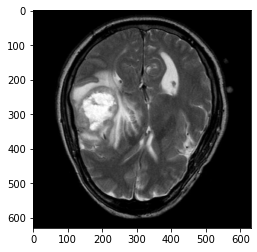

1/1 [==============================] - 0s 126ms/step
The Brain MRI Has a Tumor


In [67]:
#Tumor should be detected
image = cv2.imread('/content/Br35H_Modified/Brain_Tumor/y100.jpg') 
img = Image.fromarray(image)
img = img.resize((64,64))
img=np.array(img)
input_img = np.expand_dims(img, axis=0)
plt.imshow(image)
plt.show()
plt.show()
result = model.predict(input_img)
if result == [[1.]]:
  print("The Brain MRI Has a Tumor")
else:
  print("The Brain MRI Does not have a Tumor")

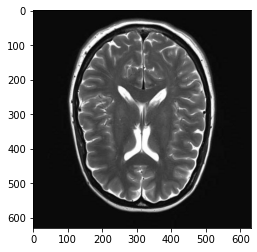

1/1 [==============================] - 0s 28ms/step
The Brain MRI Does not have a Tumor


In [69]:
#Tumor should Not be detected
image = cv2.imread('/content/Br35H_Modified/Healthy/No12.jpg') 
img = Image.fromarray(image)
img = img.resize((64,64))
img=np.array(img)
input_img = np.expand_dims(img, axis=0)
plt.imshow(image)
plt.show()
plt.show()
result = model.predict(input_img)
if result == [[1.]]:
  print("The Brain MRI Has a Tumor")
else:
  print("The Brain MRI Does not have a Tumor")